In [1]:
from google.colab import files  #biblioteca utilizada para carregar os dados para o google colab
uploaded = files.upload()

Saving comp_bikes_mod.csv to comp_bikes_mod.csv


In [0]:
#importando as bibliotecas
import pandas as pd #biblioteca utilizada para o tratamento de dados via dataframes 
import matplotlib.pyplot as plt #biblioteca utilizada para construir os gráficos

In [0]:
df = pd.read_csv('comp_bikes_mod.csv')

In [0]:
# Pergunta 1
# Com base na árvore de decisão é CORRETO afirmar:

# XXXXXX  Pode ser utilizada para classificação e regressão.
#A análise de regressão com a árvore de decisão só pode ser realizada com valores categóricos.
#Não é possível encontrar os limites de separação entre os conjuntos de dados a partir de uma classificação realizada através da árvore de decisão.
#Ávore de Decisão é utilizada apenas para a classificação de dados contínuos.

In [109]:
# Pergunta 2
# Quantos tipos diferentes de dados existem no dataset do desafio?
### Resposta: 2 tipos diferentes
df.dtypes.value_counts()

float64    16
object      1
dtype: int64

In [110]:
# Pergunta 3
# Qual é a proporção (em %) de valores nulos existente na coluna "temp" (temperatura ambiente normalizada)?
### Reposta: 10%
percentnull = df['temp'].isnull().sum() / (df['temp'].count() + df['temp'].isnull().sum())
percentnull

0.10000575407100523

In [111]:
# Pergunta 4
# Preencha os valores nulos das colunas "hum","cnt" e "casual" com os valores médios. Utilize as variáveis "hum" e "casual" como independentes e a "cnt" como dependente. Aplique uma regressão linear. Qual o valor de R2? Utilize as entradas como teste.
# XXXXXX 0.40
#0.80
#-0.40
#-0.80

## Preenchendo valores nulos pela média
q4Colunas = ['hum','cnt', 'casual']

for q4coluna in q4Colunas:
  print("Antes:",q4coluna, df[q4coluna].sum())
  df[q4coluna].fillna(df[q4coluna].mean(), inplace = True)
  print("Depois:",q4coluna, df[q4coluna].sum())

## Determinando valores independentes e dependente
X = df[['hum','casual']].values#.reshape(-1, 1)
y = df['cnt'].values#.reshape(-1, 1)

## Aplicação de regressão linear
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
regressao= reg.fit (X,y)

#realiza a previsão
previsao=reg.predict(X)

## Encontrar valor de R2
from sklearn.metrics import r2_score #método para o cálculo do R2 (coeficiente de determinação)
print('Y = {}X {}'.format(reg.coef_,reg.intercept_))

R_2 = r2_score(y, previsao)  #realiza o cálculo do R2

print("Coeficiente de Determinação (R2):", R_2)


Antes: hum 9815.960000000001
Depois: hum 10906.691953199914
Antes: cnt 2970536.0
Depois: cnt 3300616.6577584553
Antes: casual 556556.0
Depois: casual 618399.5092385397
Y = [-100.98900093    2.20087962]X 174.98415936102225
Coeficiente de Determinação (R2): 0.40561165206692495


In [0]:
# Pergunta 5
# Comparando os valores de R2 encontrado com a regressão linear e com a árvore de decisão, é CORRETO afirmar:

## Resposta: Comparar valores das questões 4 e 14
# XXXXX O valor obtido pela árvore de decisão como regressor apresenta maior R2
#Os valores encontrados pela árvore de decisão como regressor e a regressão linear são próximos.
#O valor encontrado pela regressão linear é superior ao encontrado pela árvore de decisão.
#O valor encontrado pela árvore de decisão foi negativo.



In [113]:
# Pergunta 6
#Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Qual é o valor médio para os dados da coluna "temp" (temperatura ambiente normalizada)?

# XXXX 0,496
#0,156
#0,192
#1,192

df6 = df[df['dteday'].notnull()]
df6['temp'].mean()

0.4969259206597582

In [114]:
# Pergunta 7
# Após retirar as linhas que contém valores nulos para a coluna "dteday", passamos a contar com quantas instancias e atributos, respectivamente?

#XXXX (15641,17)
#(17,15641)
#(17,17379)
#(17379,17)
df6.shape

(15641, 17)

In [115]:
# Pergunta 8
#No dataset utilizado para o desafio, quantas instâncias e atributos existem, respectivamente?

# XXXX (17379,17)
#(1345,15)
#(15,1345)
#(17,17379)
df.shape

(17379, 17)

In [123]:
# Pergunta 9
#Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Transforme a coluna "season" em valores categóricos. Quantas categorias diferentes existem?

#XXXX 4
#3
#2
#1

df6.groupby('season').count()

,instant,dteday,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,,,,,,,,,,,,,,,,
1.0,3095,3437,3074,3074,3065,3088,3076,3127,3088,3090,3104,3437,3111,3437,3124,3437
2.0,3192,3523,3182,3176,3182,3163,3181,3160,3171,3172,3164,3523,3164,3523,3172,3523
3.0,3266,3623,3258,3254,3260,3264,3286,3232,3240,3270,3291,3623,3261,3623,3249,3623
4.0,3091,3478,3129,3114,3148,3131,3106,3163,3137,3121,3120,3478,3136,3478,3123,3478


In [127]:
# Pergunta 10
#Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Transforme a coluna "dteday" no tipo "datetime". Qual é a última data presente no dataset ( YYYY-MM-DD)?

#XXXX 2012-12-31
#2012-01-31
#2014-12-31
#2012-01-31

df6['dteday']=pd.to_datetime(df6['dteday'], infer_datetime_format=True)
df6[['dteday']].tail(1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,dteday
17378,2012-12-31


In [128]:
# Pergunta 11
#Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Qual é o desvio padrão para os dados da coluna "windspeed" (velocidade do vento normalizada)?

# XXXX 0,122
#1,122
#0,192
#0,189

df6['windspeed'].std()

0.12230930508286268

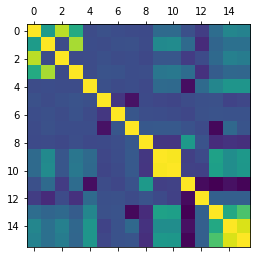

,hum,cnt
hum,1.000000,-0.292451
cnt,-0.292451,1.000000


In [129]:
# Pergunta 12
#Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Selecione as colunas "season", "temp", "atemp", "hum", "windspeed". Plot a matriz de correlação. Sobre as variáveis "hum" e "cnt" é CORRETO afirmar:

#XXXX Possuem baixa correlação linear negativa.
#Possuem alta correlação linear negativa.
#Possuem alta correlação linear positiva.
#Possuem baixa correlação linear positiva.

# matriz de correlação com variáveis solicitadas
df12 = df6[['season', 'temp','atemp','hum','windspeed']]
plt.matshow(df6.corr())
plt.show()

# Resposta da pergunta da correlação entre 'hum' e 'cnt'
df6[['hum','cnt']].corr()

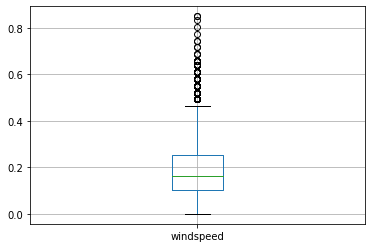

In [130]:
# Pergunta 13
# Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Considerendo o boxplot da variável "windspeed" (velocidade do vento) é CORRETO afirmar?

#XXXX Existem possíveis outliers, pois existem marcações (pontos) foras dos limites do boxplot.
#Existem possíveis outliers, pois não existem marcações (pontos) foras dos limites do boxplot.
#Não existem possíveis outliers, pois não existem marcações (pontos) foras dos limites do boxplot.
#Não existem possíveis outliers, pois existem marcações (pontos) foras dos limites do boxplot.

df6[['windspeed']].boxplot()

In [131]:
# Pergunta 14
# Utilize os mesmos dados da questão anterior ("hum" e "casual" como variáveis independentes e "cnt" como variavel dependente). Aplique a árvore de decisão como regressão. Qual é o valor aproximado de R2? Utilize as entradas como teste e valores "default".

# XXXX 0,70
#0,40
#0,30
#1,00

# Aplicação da árvore de decisão do pacote Sklearn
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)
previsaoTree = clf.predict(X)
R_2 = r2_score(y, previsaoTree)  #realiza o cálculo do R2

print("Coeficiente de Determinação (R2):", R_2)

Coeficiente de Determinação (R2): 0.6973174287156154


In [0]:
# Pergunta 15
#Comparando o SVM com a árvore de decisão é CORRETO afirmar:

# XXXX SVM encontra o hiperplano que gera a maior separação entre os dados.
#SVM e Árvore de Decisão só podem ser utilizados para modelos de classificação.
#Árvore de decisão encontra os hiperplanos de separação do mesmo modo que o SVM.
#Através da Árvore de Decisão não é possível encontrar os limiares de separação entre as classes.